In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("./users.csv")  # Update with actual file path

# Sample 2,000 users
df_sample = df.sample(n=2000, random_state=42).reset_index(drop=True)

# One-Hot Encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_sample[["Country", "AgeGroup"]])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Add UserID for reference
encoded_df["UserID"] = df_sample["UserID"]


   UserID      Country AgeGroup  DBSCAN_Cluster
0   75722  Switzerland    55-64              -1
1   80185        China    35-44               0
2   19865      Romania    65-74               1
3   76700       Mexico    55-64               2
4   92992      Germany    45-54               3
5   76435       France    35-44               4
6   84005        Japan    55-64               5
7   80918        Italy    55-64               6
8   60768        Nepal    45-54              -1
9   50075     Pakistan    35-44               7
Cluster Distribution:
DBSCAN_Cluster
-1     330
 16    187
 8     175
 0     158
 9      94
 20     84
 3      80
 5      76
 14     61
 2      58
 4      56
 28     41
 6      40
 13     36
 15     32
 26     30
 23     28
 24     27
 18     24
 21     24
 12     24
 7      22
 35     22
 32     20
 29     18
 27     17
 42     16
 37     16
 10     16
 25     16
 36     16
 22     15
 34     14
 19     14
 17     13
 11     13
 39     13
 41     12
 38     11
 40   

C:\Users\raulb\AppData\Local\Temp\ipykernel_8100\3457012061.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_sample["DBSCAN_Cluster"], palette="viridis")


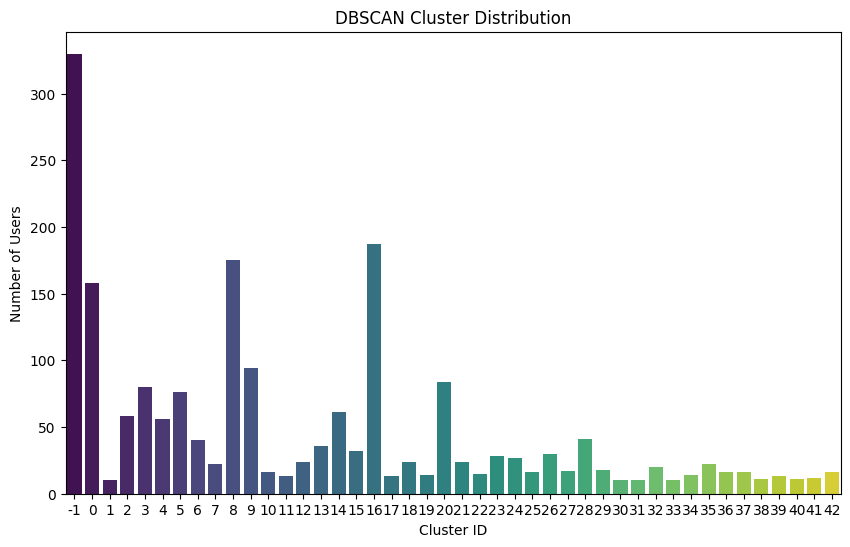

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale data (DBSCAN is sensitive to scale)
scaled_data = StandardScaler().fit_transform(encoded_features.toarray())

# Set DBSCAN parameters
eps_value = 0.5  # Adjust based on your dataset
min_samples_value = 10  # Minimum points to form a dense region

# Train DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric="cosine")
df_sample["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_data)

# Show sample results
print(df_sample[["UserID", "Country", "AgeGroup", "DBSCAN_Cluster"]].head(10))

print("Cluster Distribution:")
# Count number of users in each cluster
print(df_sample["DBSCAN_Cluster"].value_counts())

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df_sample["DBSCAN_Cluster"], palette="viridis")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Users")
plt.title("DBSCAN Cluster Distribution")
plt.show()


In [5]:
chosen_cluster = 1

# Filter users belonging to the chosen cluster
cluster_users = df_sample[df_sample["DBSCAN_Cluster"] == chosen_cluster]

# Display a random sample of 5 users from this cluster
print(cluster_users[["UserID", "Country", "AgeGroup"]].sample(n=10, random_state=42))


      UserID  Country AgeGroup
1840   59951  Romania    25-34
19     69162  Romania    35-44
938     9495  Romania    55-64
2      19865  Romania    65-74
1748   29415  Romania    65-74
323    63343  Romania    55-64
1843   67293  Romania    25-34
706    74412  Romania    45-54
352    98435  Romania    25-34
1470   80550  Romania    45-54
